# Creating animations

Two different functions are available for animating data slices: `animate_slice_axis` enables animation along the third (out-of-plane) direction of a slice, and `animate_slice_temp` enables animation of a single slice across a temperature series.

## Animate along an axis using `animate_slice_axis()`

`animate_slice_axis()` requires the specification of an `axis` along which to animate (`0`=H, `1`=K, `2`=L, typically), and a set of `axis_values` which must be an iterable providing the values of the `axis` at each frame of the animation. It also generally good practice to specify the colorbar limits to keep them consistent across frames. This can be accomplished by passing in a dict of keyword arguments via `plot_slice_kwargs`, in a manner analogous to the `plot_slice()` function.

For example, to animate the HK scattering plane at different values of L, `axis` should be `2` and the L values may be specified using `numpy.arange(-1.0, 1.0, 0.1)`, which specifies a starting value of `-1.0`, an ending value of `1.0`, and a step size of `0.05` along L.

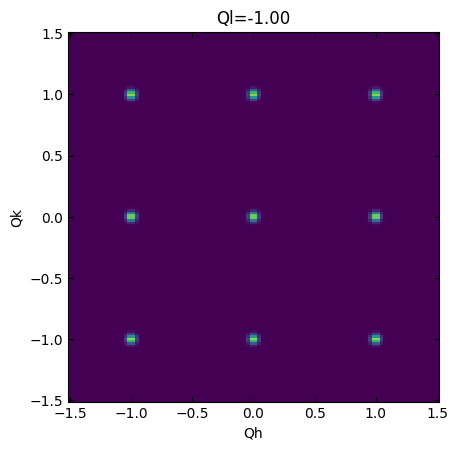

In [ ]:
from nxs_analysis_tools import *
from nxs_analysis_tools.datasets import cubic

import matplotlib.pyplot as plt
import numpy as np

# Download sample data to cache and save directory as sample_dir
sample_dir = cubic()

# Load data
data = load_transform(sample_dir + '/cubic_300.nxs', print_tree=False)
# Use load_data() if loading legacy data from CHESS!

# Generate animation
animate_slice_axis(data=data, axis=2, axis_values=np.arange(-1.0, 1.0, 0.05), plot_slice_kwargs={'vmin':0, 'vmax':100000})

## Animate across temperatures using `animate_slice_temp()`

Similar to `animate_slice_axis()`, `animate_slice_temp()` accepts a `nxs_analysis_tools.chess.TempDependence` object in place of a single dataset, and animates along the temerature axis.

In this case, a slice must be chosen using the `slice_obj` argument, which is analogous to indexing a `nexusformat.nexus.NXdata` object, though to access all values along an axis `None` must be used in place of `:`. While these arguments are converted to slice objects within the function, in order to specify a range a `slice` type must be passed directly. For example, to access the slice `data[-0.5:0.5, :, 0.0]`, the corresponding `slice_obj` would be `[slice(-0.5,0.5), None, 0.0]`.

The `reverse_temps` argument controls whether frames are animated upon cooling (`False`, Default) or warming (`True`).

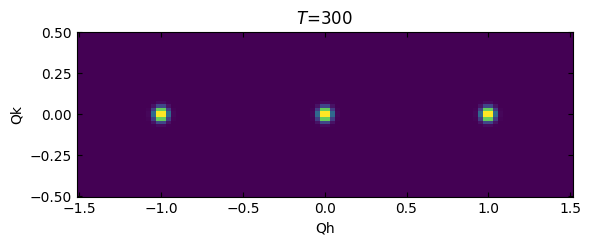

In [6]:
# Load the temperature dependent datasets
sample = TempDependence(sample_dir)
sample.load_transforms(print_tree=False)

# Animate the slice `data[:, -0.5:0.5, 0.0]` across temperatures
animate_slice_temp(temp_dependence=sample, slice_obj=[None, slice(-0.5,0.5), 0.0], plot_slice_kwargs = {'vmin':0, 'vmax':50000})

## Customizing the plots

To customize these plots further, additional keyword arguments may be passed to `plot_slice` via the dict `plot_slice_kwargs`. Keyword arguments may also be passed to the matplotlib axes via `ax_kwargs`. See an example below. Additionally, a custom axes object may be passed via the `ax` argument.

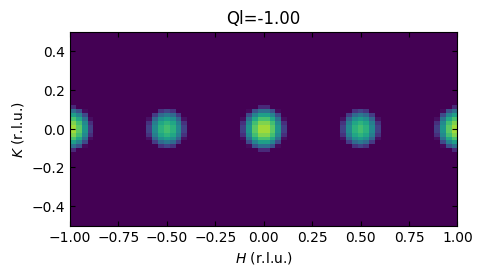

In [14]:
# Load data
data = load_transform(sample_dir + '/cubic_15.nxs', print_tree=False)

# Generate custom figure and axes
fig,ax = plt.subplots(figsize=(5,3))

# Generate animation
animate_slice_axis(data=data, axis=2, axis_values=np.linspace(-1.0, 1.0, 45), 
    ax=ax, # The plot will draw on the specified axes
    plot_slice_kwargs = {'vmin':1, 'vmax':500000, 'skew_angle':90, 'logscale':1}, # These arguments are passed to `plot_slice()`
    ax_kwargs = {'xlim':(-1,1), 'ylim':(-0.5,0.5), 'xlabel':'$H$ (r.l.u.)', 'ylabel':'$K$ (r.l.u.)'} # These arguments are passed to `ax.set()`
)

## Saving the animation as a GIF

Both of the above functions offer the funcitonality of saving the animation as a gif using `save_gif=True`. Optionally, the `filename` and `interval` (in milliseconds) can also be set.

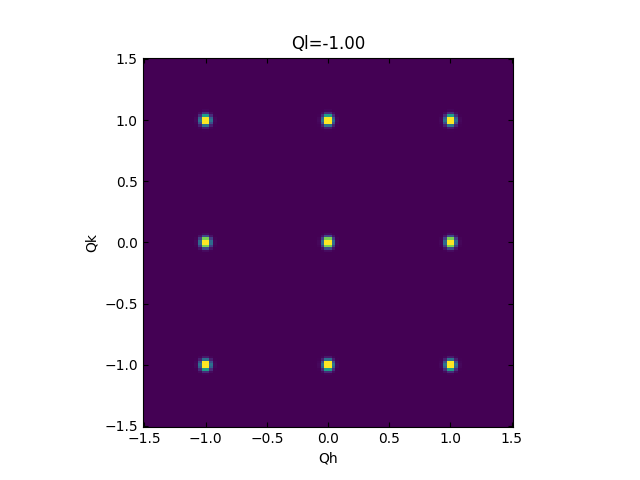

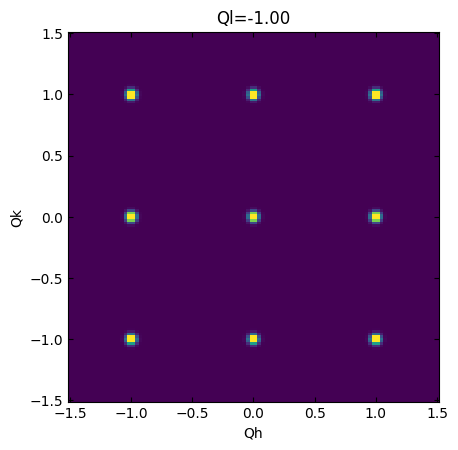

In [16]:
# Load data
data = load_transform(sample_dir + '/cubic_300.nxs', print_tree=False)

# Generate animation
animate_slice_axis(data=data, axis=2, axis_values=np.linspace(-1.0, 1.0, 45), plot_slice_kwargs={'vmin':0, 'vmax':50000},
    save_gif=True, filename='img/my_animation', interval=100,
)